In [1]:
library(data.table)
library(ggplot2)
library(cowplot)
library(ggforce)
library(ggbreak)
library(scales)

ggbreak v0.1.4 Learn more at https://yulab-smu.top/



If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846




In [2]:
setwd('/home/n10927662/rossenzhao/land-use-viromes')

In [ ]:
tools=c('lyrebird', 'metaphlan4', 'phanta')
correct_taxonomy_tools = c('lyrebird')

publication_names = data.table(
    tool = tools,
    publication_name = c('Lyrebird', 'MetaPhlAn4', 'Phanta')
)
name_to_publication_name = function(names, correct_taxonomy_only=F){
    to_return = c()
    for (name in names){
        to_return = c(to_return, publication_names[tool==name]$publication_name)
    }
    if (correct_taxonomy_only){
        return(factor(to_return, levels=publication_names[tool %in% correct_taxonomy_tools]$publication_name))
    } else {
        return(factor(to_return, levels=publication_names$publication_name))
    }
}

## Plot broken barchart for land-use-viromes results

In [ ]:
species_counts = fread("tool_results3.csv")
species_counts[, tool:=name_to_publication_name(tool)]
species_counts

tool,count
<fct>,<int>
Lyrebird,526251
Phanta,162
MetaPhlAn4,37


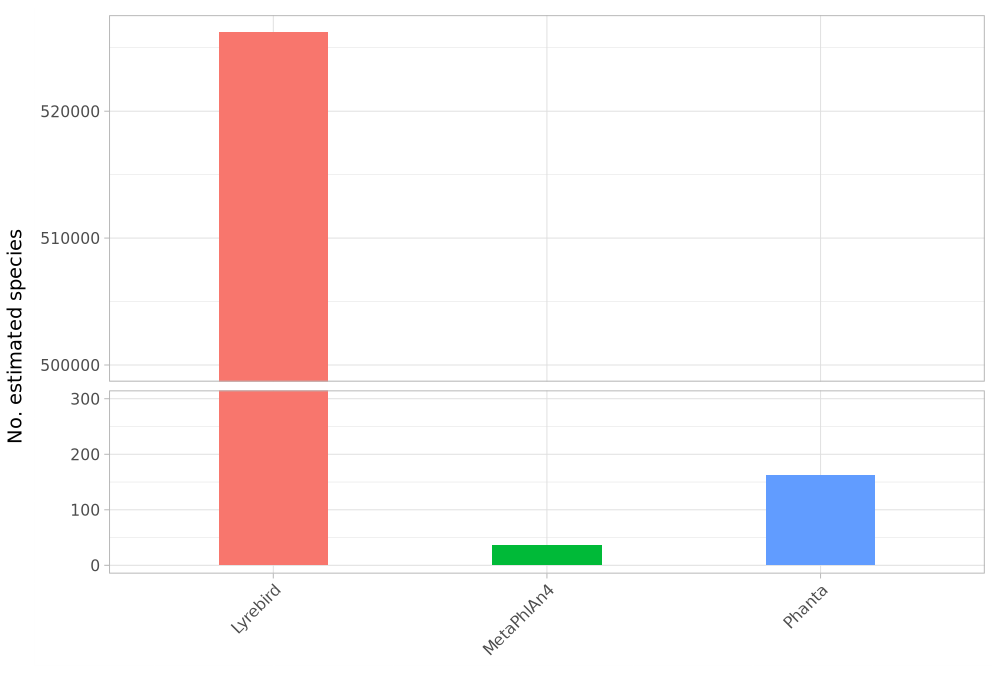

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7, repr.plot.res = 100)
broken_bar = ggplot(species_counts, aes(x=tool, y=count, fill=tool)) +
    geom_bar(stat="identity", width=0.4) +
    theme_light(base_size=14) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    labs(x='', y='No. estimated species') +
    theme(legend.position = 'none') +
    scale_y_break(breaks=c(300,500000), scales=2) 

broken_bar

## Plot pie charts

In [ ]:
reads_vs_contigs = fread("lyrebird_vs_contigs3.csv")
reads_vs_contigs

category,count
<chr>,<int>
OTUs only in reads,3341583
OTUs in contigs,254370


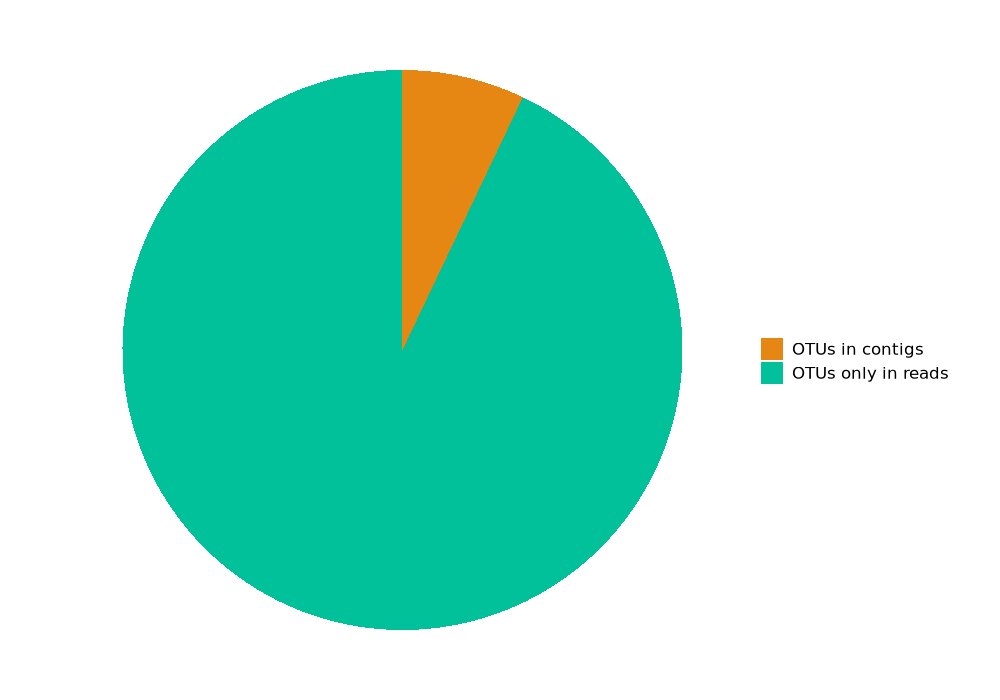

In [ ]:
pie_reads_vs_contigs = ggplot(reads_vs_contigs, aes(x='', y=count, fill=category)) +
    geom_bar(stat="identity", width=1) +
    coord_polar("y", start=0, direction = -1) +
    scale_fill_manual(values=c('#E68613', '#00C19A')) +
    labs(fill='') +
    theme_void() +
    theme(legend.text = element_text(size=12))
pie_reads_vs_contigs

In [9]:
contigs_vs_otus = fread("contig_with_otu_vs_not3.csv")
contigs_vs_otus

category,count
<chr>,<int>
Contigs without OTUs in reads,12543
Contigs with OTUs in reads,47153


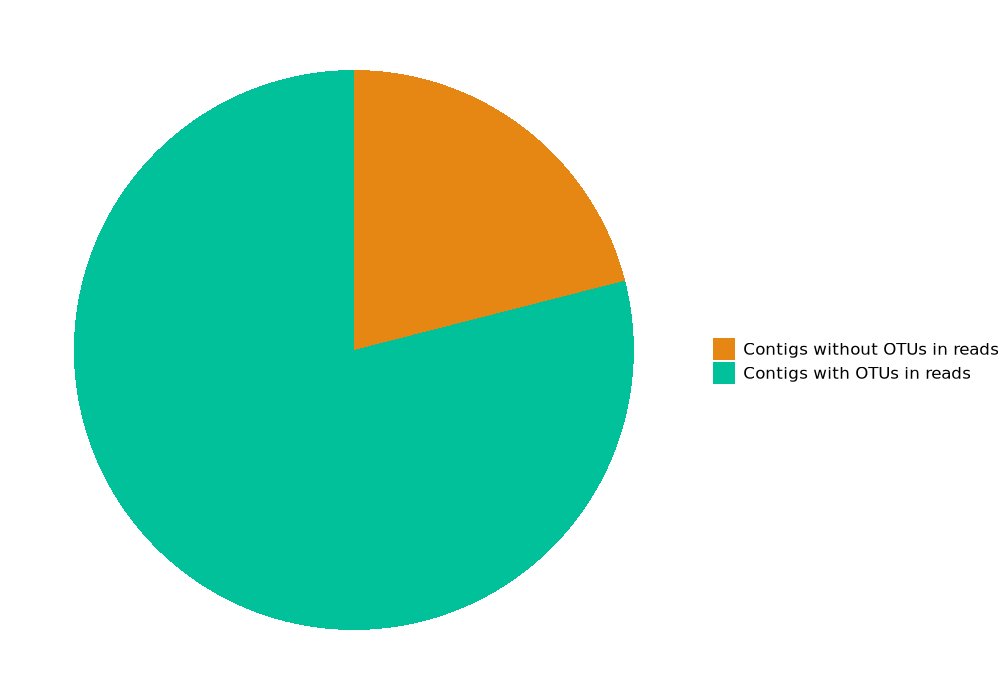

In [10]:
contigs_vs_otus[, category := factor(category, levels = unique(contigs_vs_otus$category))]
pie_contigs_vs_otus = ggplot(contigs_vs_otus, aes(x='', y=count, fill=category)) +
    geom_bar(stat="identity", width=1) +
    coord_polar("y", start=0, direction=-1) +
    scale_fill_manual(values=c('#E68613', '#00C19A')) +
    labs(fill='') +
    theme_void() +
    theme(legend.text = element_text(size=12))
pie_contigs_vs_otus

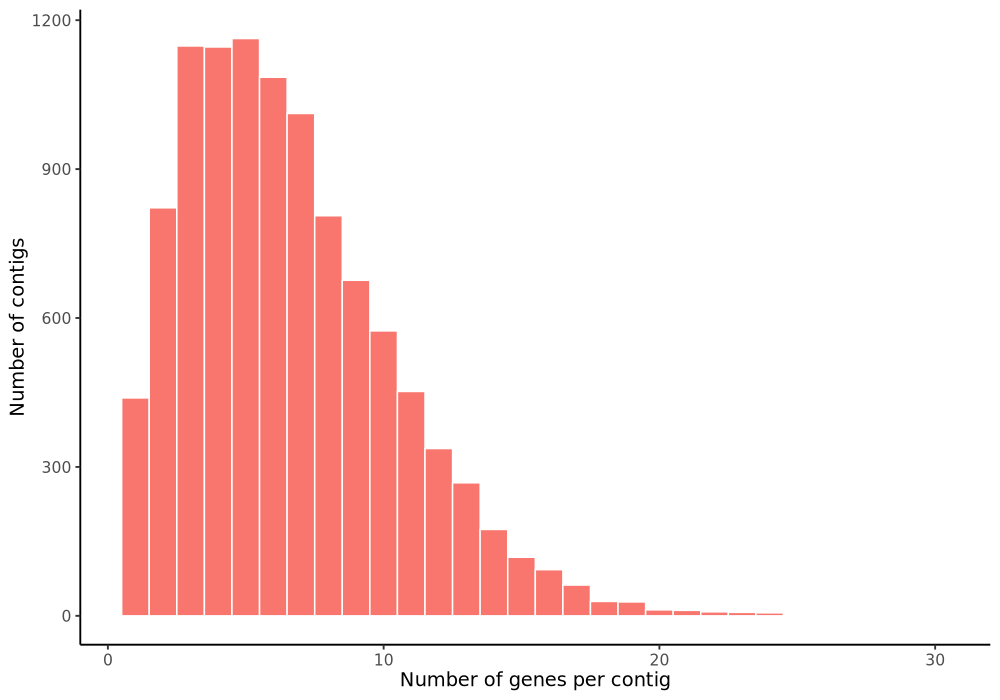

In [11]:
genes_per_contig = fread("genes_per_contig3.csv")
# histogram
genes_per_contig_hist = ggplot(genes_per_contig, aes(x=genes_per_contig)) +
    geom_histogram(binwidth=1, fill="#F8766D", color="white") +
    theme_classic(base_size=14) +
    labs(x='Number of genes per contig', y='Number of contigs')
genes_per_contig_hist

## Put it all together

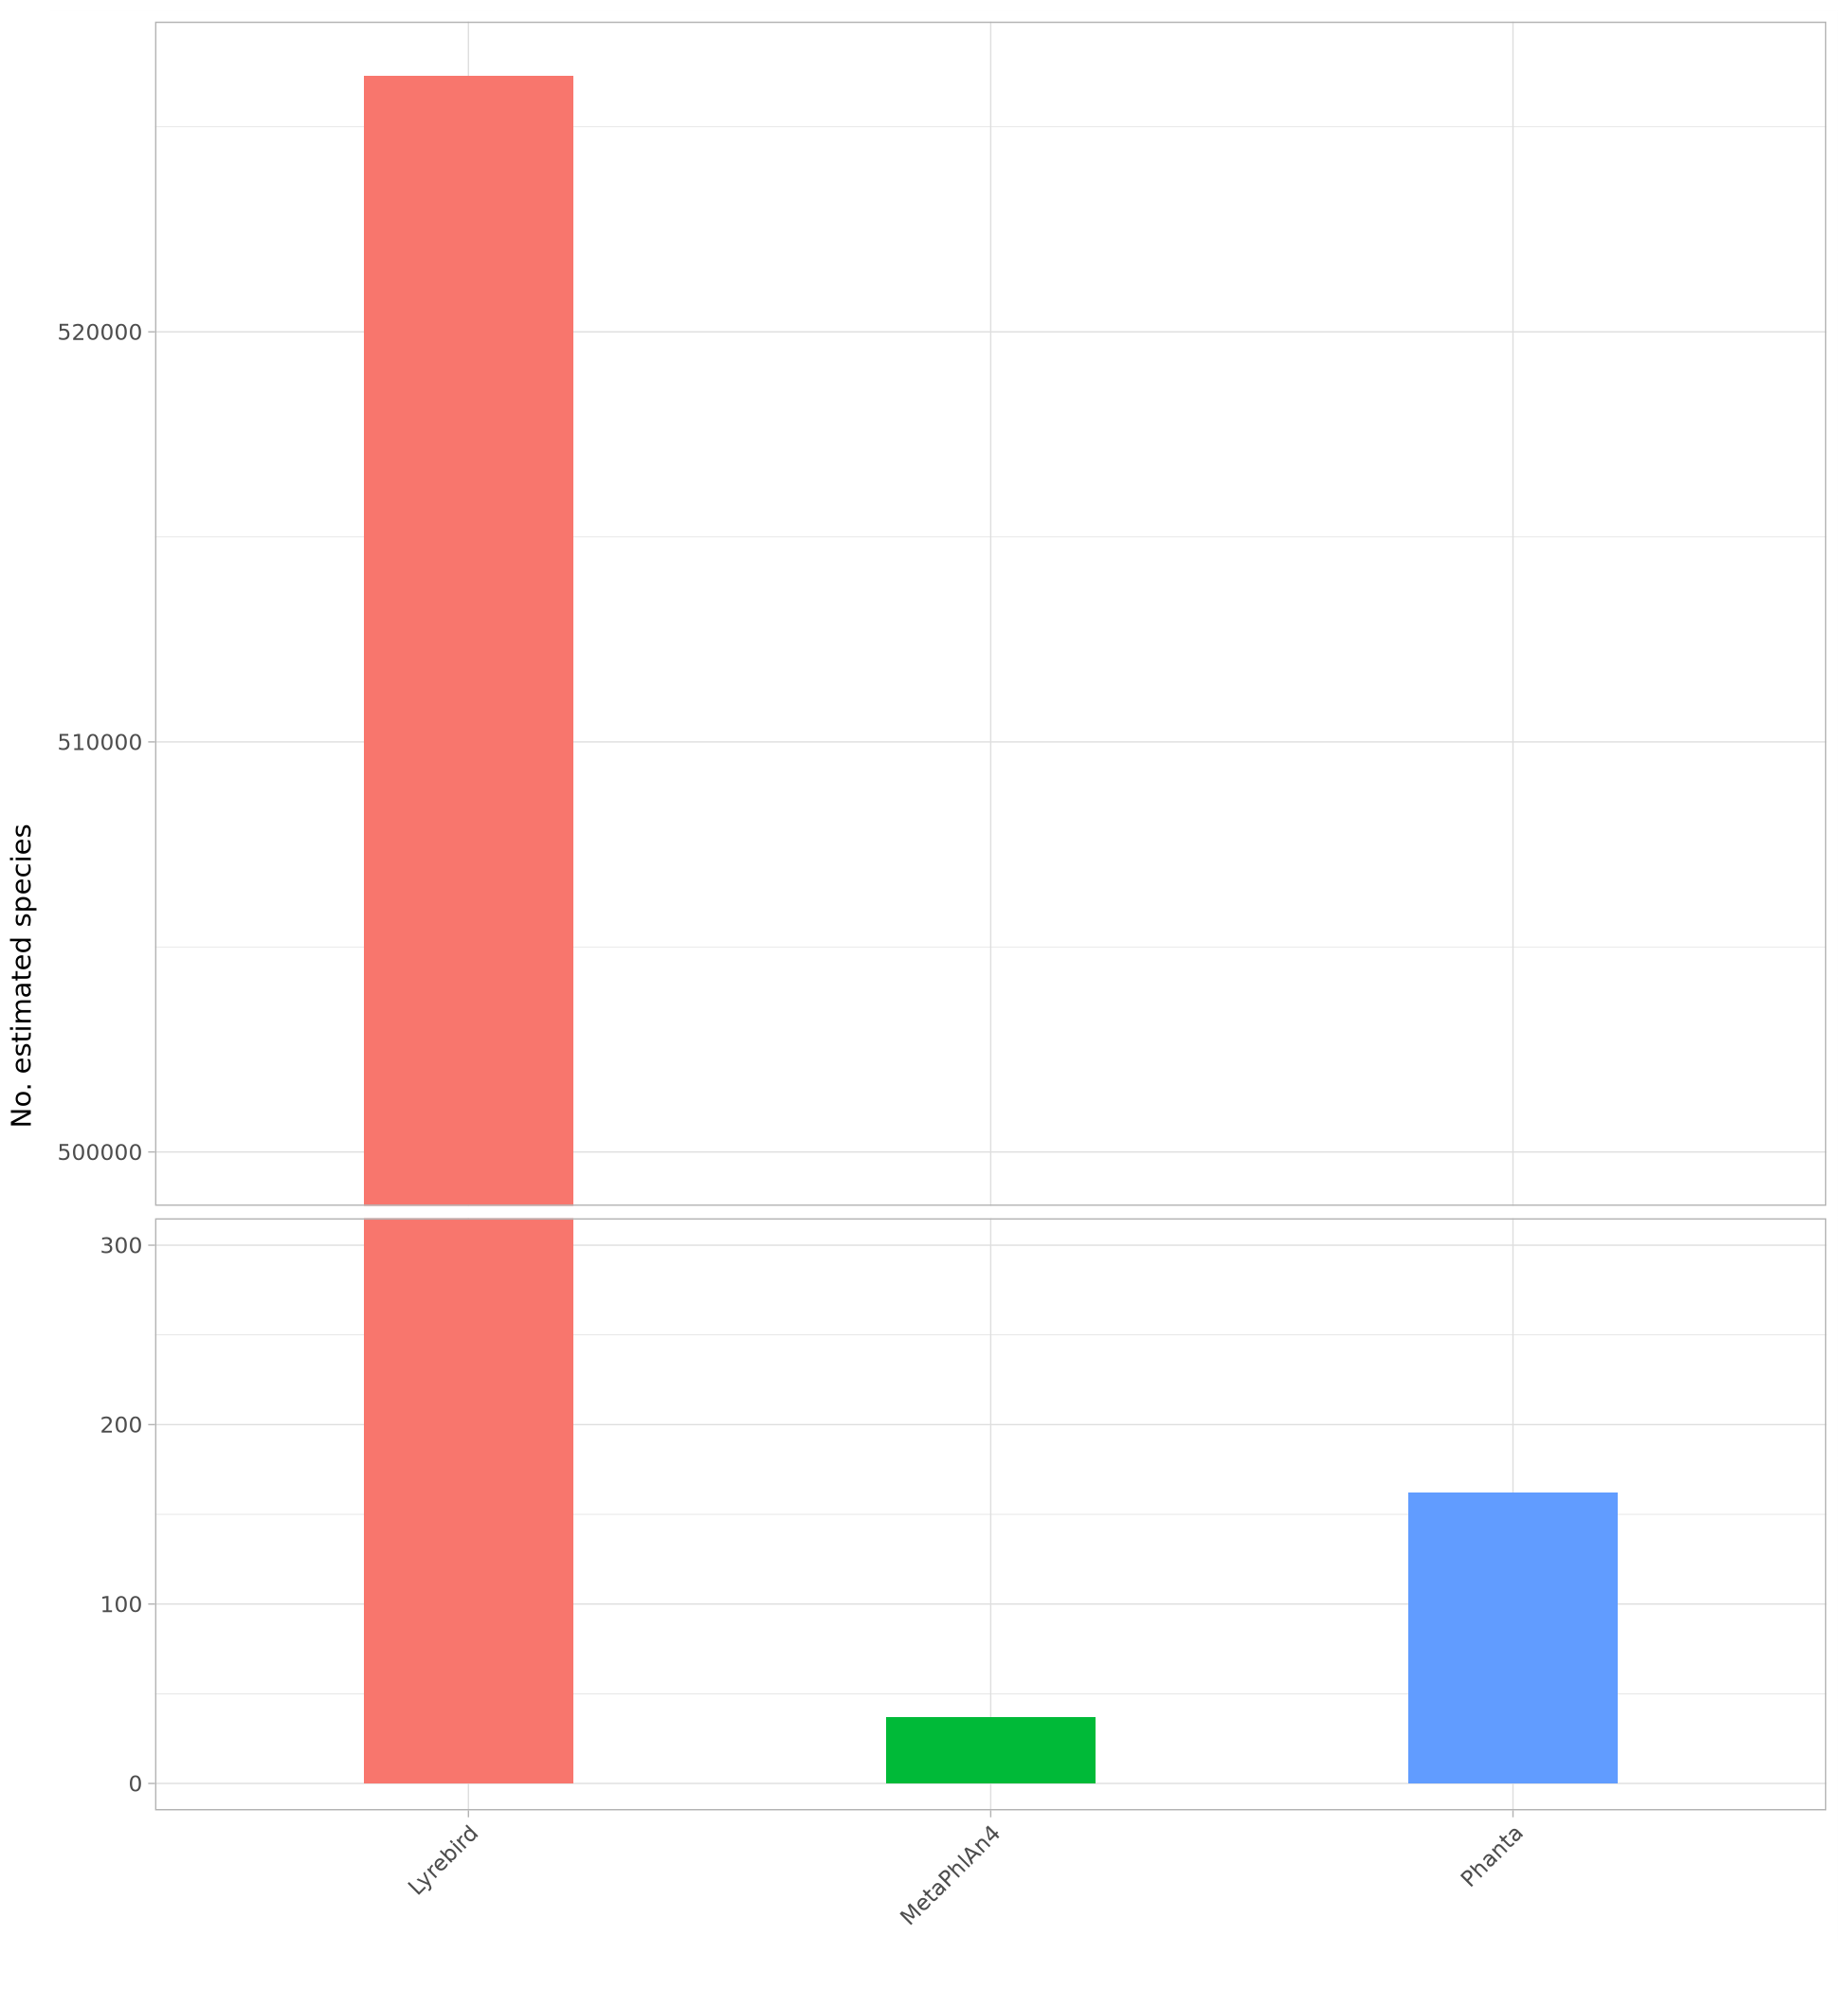

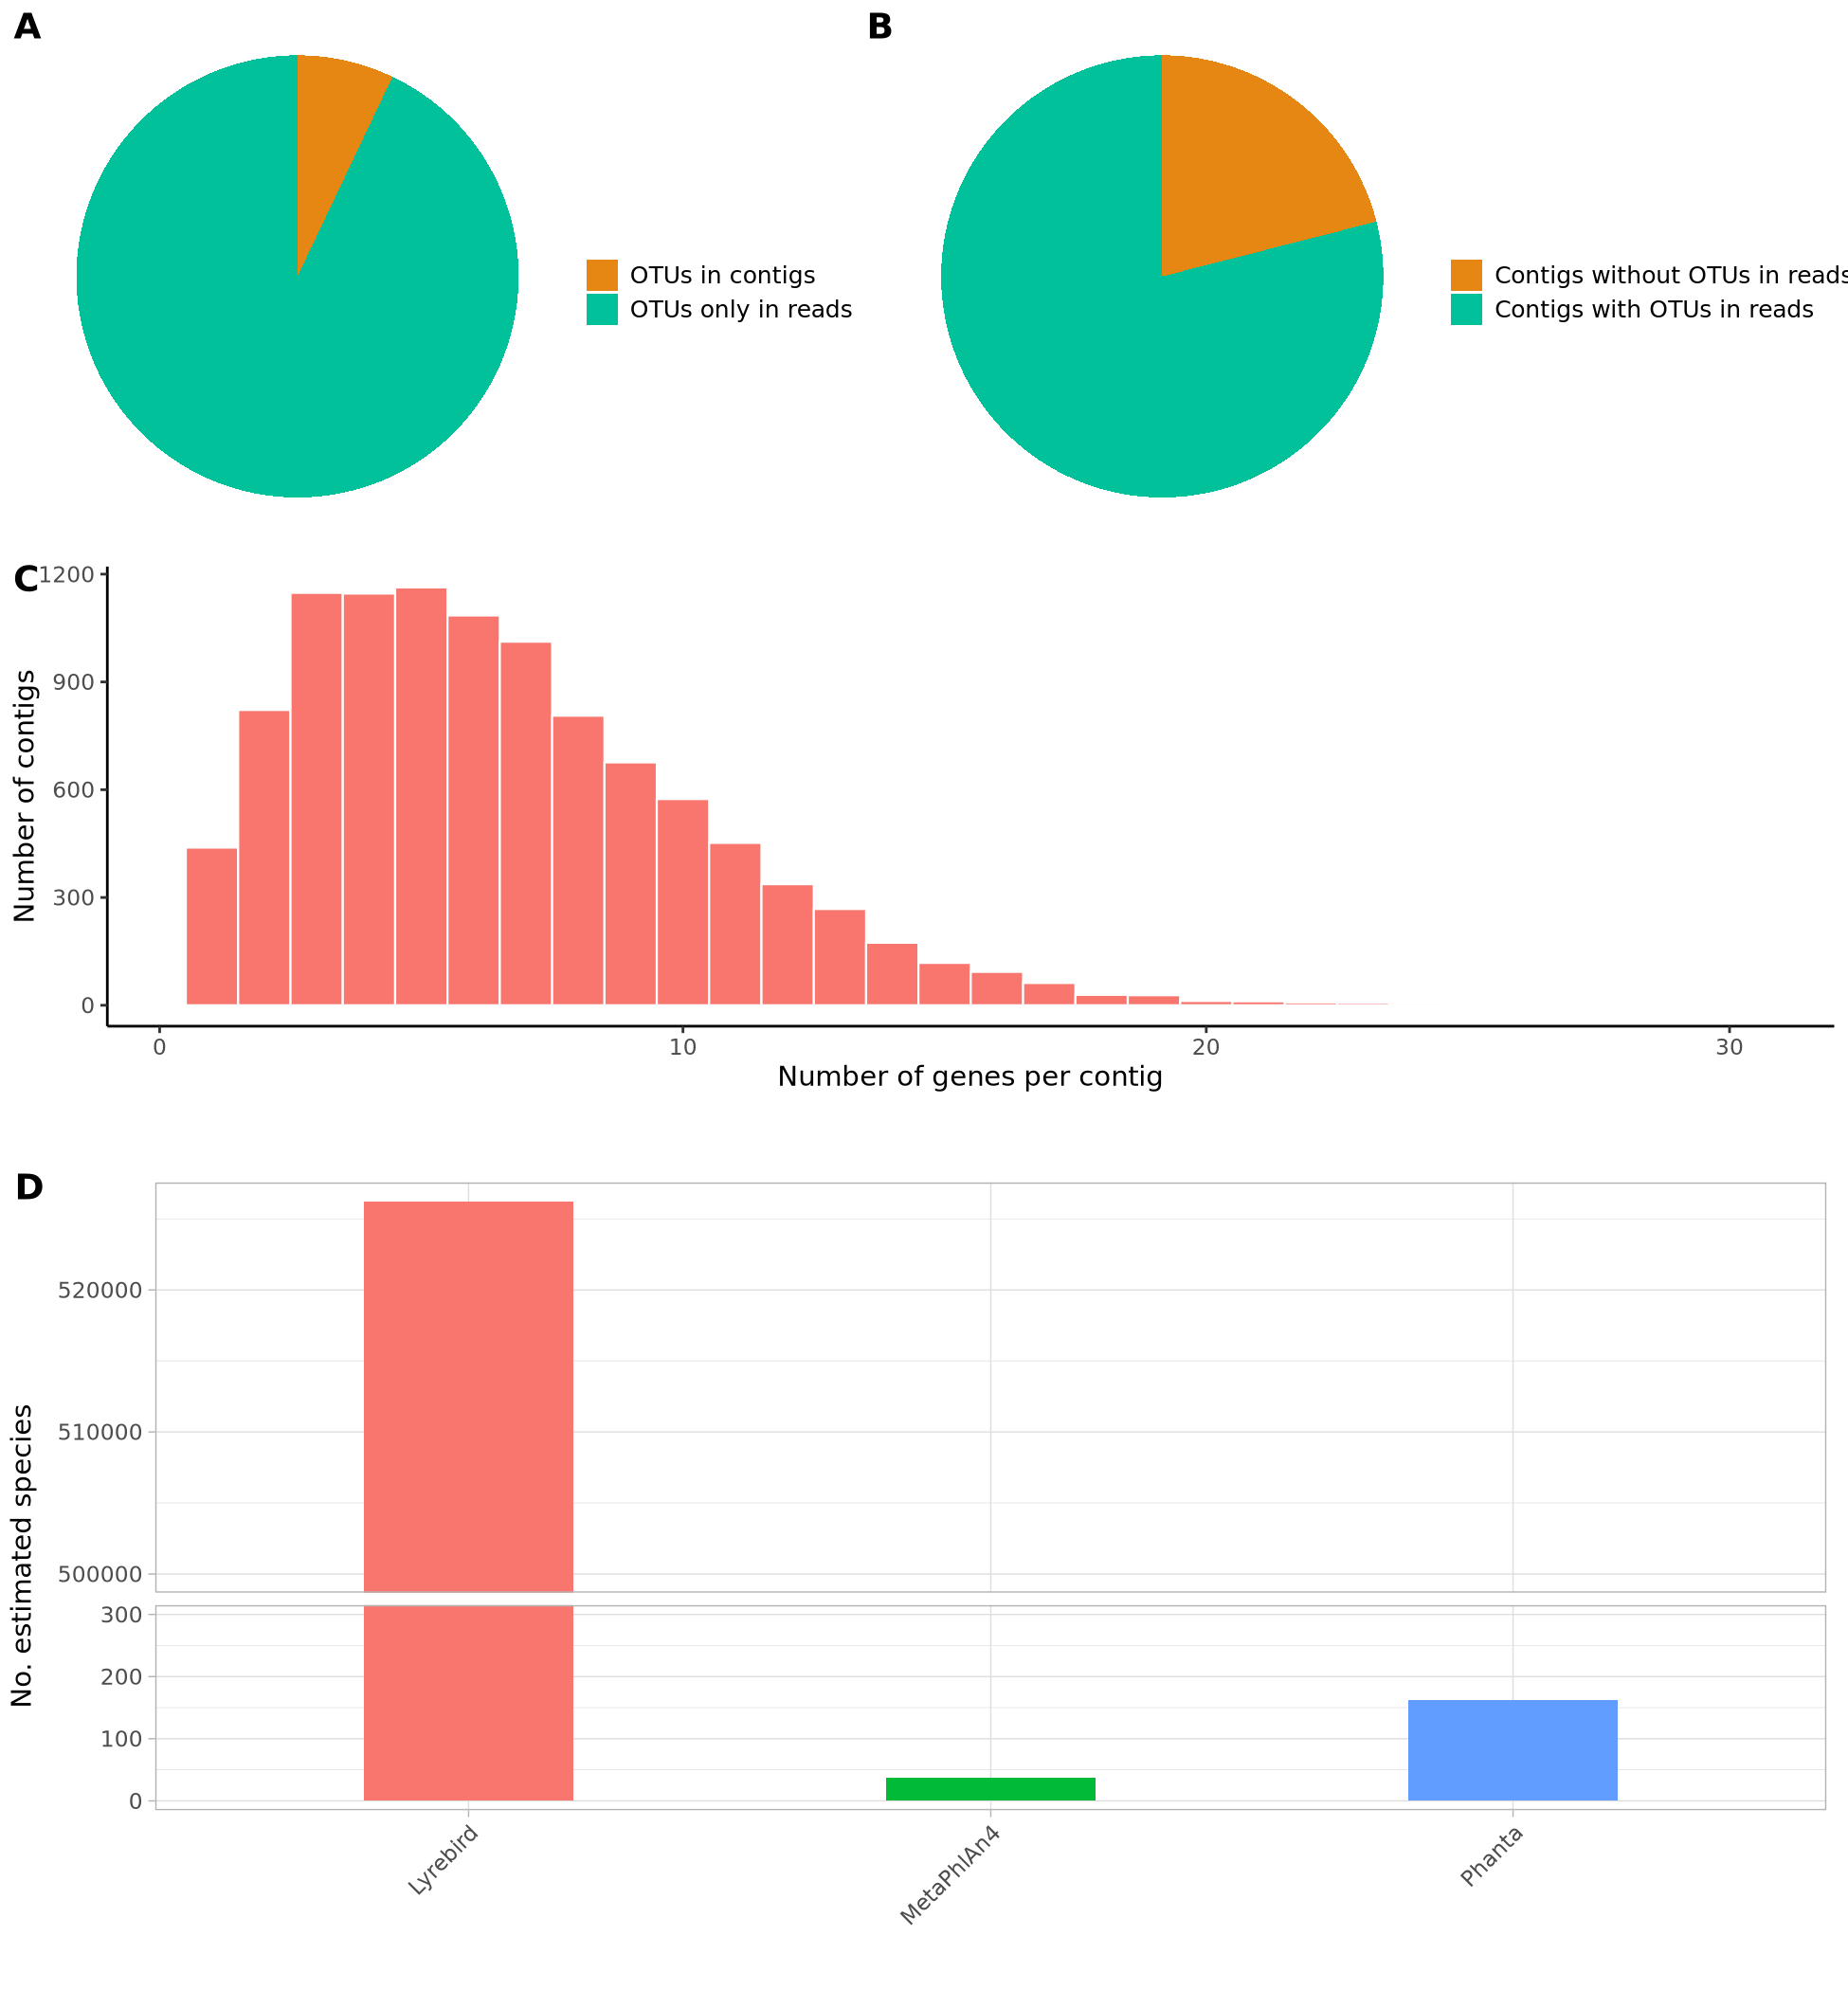

In [12]:
options(repr.plot.width = 13, repr.plot.height = 14, repr.plot.res = 150)
top_row = plot_grid(pie_reads_vs_contigs, pie_contigs_vs_otus, ncol=2, rel_widths=c(6,7), labels=c('A', 'B'), label_size=18)
plot_grid(top_row, genes_per_contig_hist,NULL, print(broken_bar),  ncol=1, rel_heights=c(2, 2, 0.2, 3), labels = c('', 'C', '', 'D'), label_size=18)


In [ ]:
library(ggvenn)

# otus in contigs + reads, otus in contigs, otus in reads, contigs without otus

# venn_reads_vs_contigs = ggplot(reads_vs_contigs, aes(fill=category)) +
#     geom_venn(width=0.5, alpha=0.7) +
#     scale_fill_manual(values=c('#E68613', '#00C19A')) +
#     labs(fill='') +
#     theme_void() +
#     theme(legend.text = element_text(size=12))

# venn_reads_vs_contigs
reads_vs_contigs

Loading required package: dplyr

Warning message:
“package ‘dplyr’ was built under R version 4.4.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid



category,count
<chr>,<int>
OTUs only in reads,3341583
OTUs in contigs,254370


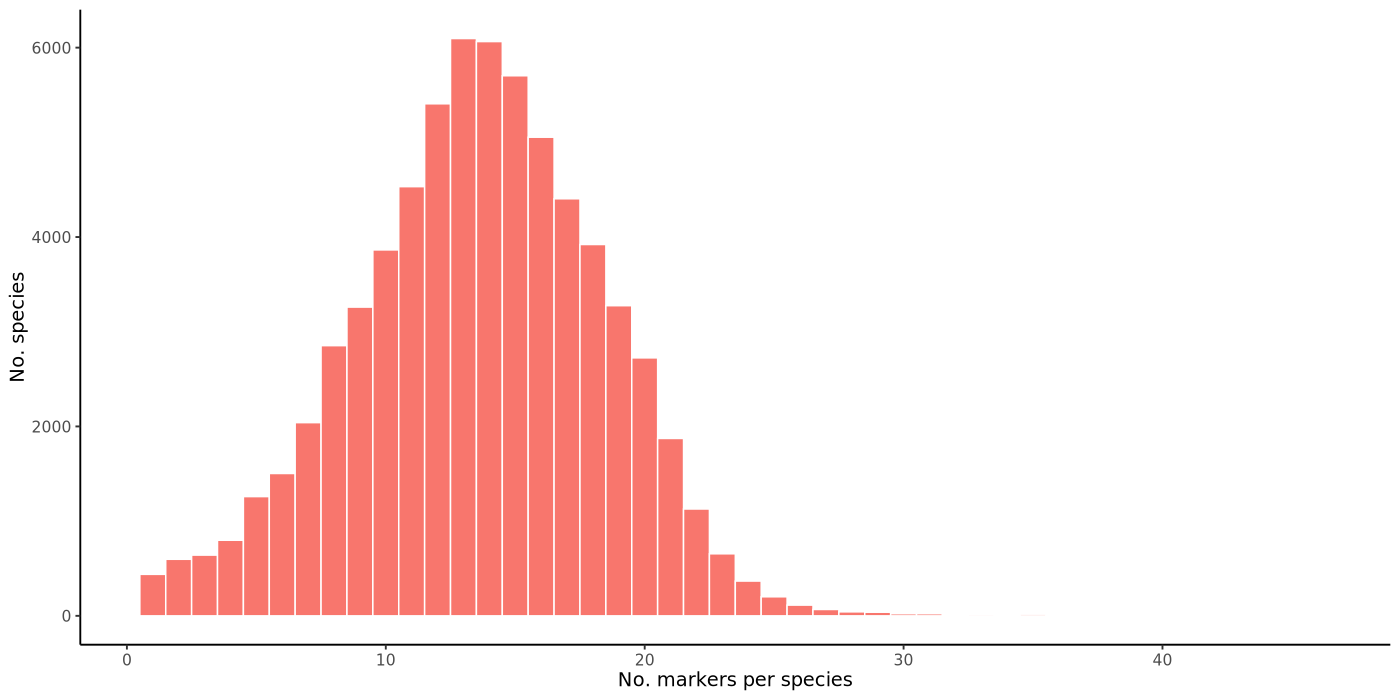

In [14]:
options(repr.plot.width = 14, repr.plot.height = 7, repr.plot.res = 100)
# marker counts
markers_per_species = fread("/mnt/hpccs01/work/microbiome/msingle/rossenzhao/phrogs_v4.1/0.3/marker_gene_count.csv")

# histogram
markers_per_species_hist = ggplot(markers_per_species, aes(x=count)) +
    geom_histogram(binwidth=1, fill="#F8766D", color="white") +
    theme_classic(base_size=14) +
    labs(x='No. markers per species', y='No. species')
markers_per_species_hist


# genes_per_contig = fread("genes_per_contig3.csv")
# # histogram
# genes_per_contig_hist = ggplot(genes_per_contig, aes(x=genes_per_contig)) +
#     geom_histogram(binwidth=1, fill="#F8766D", color="white") +
#     theme_classic(base_size=14) +
#     labs(x='Number of genes per contig', y='Number of contigs')
# genes_per_contig_hist

In [15]:
genes_per_contig

genes_per_contig
<int>
6
9
5
3
5
2
4
6
8
